# ESCI 445 - Programming Exercise 4-4

### Modeling the 1D Advection Equation Using the Forward-in-time, Backward-in-space Scheme

Variables

+ nx: number of x data points
+ ny: number of y data points
+ dx: $\Delta x$, spacing between data points (meters)
+ dt: $\Delta t$, time interval (seconds)
+ c: speed of advection (either wind speed or wave speed)
+ u: parameter being advected
+ u_now: value of <i>u</i> at current time step
+ u_new: value of <i>u</i> at next time step

The 1D advection equation is $\dfrac{\partial u}{\partial t}+c\dfrac{\partial u} {\partial x}=0$.  This notebook will show the steps for how to model this equation using the forward-in-time, backward-in-space scheme for positive values of <i>c</i>.

### Import libraries

In [15]:
import numpy as np   # Import numerical python aliased to np
import matplotlib.pyplot as plt  # Import matplotlib pyplot aliased to plt
from matplotlib import rcParams

### Define fixed model parameters

In [16]:
### 
dx = 1e3  #  Grid spacing in meters
dt = 30.0  # Time interval in seconds
nx = 601   #  Number of grid points
n_total = 500  # Final time index at end of simulation
n_save = 10   #  Number of iterations between saves
x = np.arange(0,nx)*dx/1000.0  #  Grid values (in kilometers)

### Define user-specified model parameters

In [17]:
width = 20   #  Signal width in grid points
c = 15.0   # Speed of wave in meters per second
gamma = 0.05

### Define arrays holding the solution values

In [18]:
u_now = np.zeros(nx, dtype = np.float_)  #  Value at current time step
u_next = np.zeros_like(u_now)  #  Value at next time step
u = np.zeros((0, nx), dtype = np.float_)  # define a variable to hold the output values

### Initialize the solution at time zero.

In [19]:
Gaussian = False  # If true, initial data is Gaussian.  Otherwise, it is rectangel

if Gaussian:
    std = 6.0  # number of gridpoints for standard deviation
    arg = ((nx/2-np.arange(0,nx))**2)/(4*std**2)
    u_now[0:nx] = np.exp(-arg)
else:
    width = 20   #  Signal width
    start, stop = int(nx/2) - int(width/2), int(nx/2) + int(width/2)
    u_now[start:stop] = 1.0

u = np.vstack((u, u_now))    #  Saves initial data for output

### <font color = 'blue'>Main loop over time, with nested loop over grid

In [20]:
n = 0
sigma = c*dt/dx  # Defined here so it isn't in the loop

#Standalone Upwind
if c>0: #FITBIS
        for i in range (1,nx):
            u_next[i] = u_now[i] - sigma * (u_now[i] - u_now[i-1])
else: #FITFIT
    for i in range(0,nx-1):
        u_next[i] = u_now[i] - sigma * (u_now[i+1] - u_now[i])

u_past = np.copy(u_now)
u_now = np.copy(u_next)

for n in range(1, n_total): # start of time loop
   
    # Write your code here to loop through the grid
    for i in range(1,nx-1):
        u_next[i] = u_past[i] - sigma * (u_now[i+1] - u_now[i-1])
    u_now = u_now + gamma*(u_next - (2*u_now) + u_past)
    #Swap the vars
    u_past = np.copy(u_now)
    u_now = np.copy(u_next)

    # Prints out amplitude of signal
    print(n+1, np.max(abs(u_now)))
    
    # Save output
    if (n+1) % n_save == 0:
        u = np.vstack((u, u_now))

2 1.2475
3 1.259875
4 1.23225625
5 1.2280515625
6 1.23042375
7 1.23434893125
8 1.23433847438
9 1.2390397171
10 1.23075838461
11 1.22364499327
12 1.24886922691
13 1.22523754118
14 1.21414623633
15 1.25286228564
16 1.21597798422
17 1.22802302186
18 1.24940984419
19 1.21237074735
20 1.23575054057
21 1.23852962603
22 1.23283401106
23 1.23607650512
24 1.22084608981
25 1.24245251467
26 1.22869505665
27 1.22620612544
28 1.24217201008
29 1.21395545906
30 1.23562047248
31 1.23302845782
32 1.23156201761
33 1.23551492758
34 1.21614545
35 1.2385820338
36 1.2266062705
37 1.23041311943
38 1.23592161553
39 1.22192952658
40 1.2355106782
41 1.22461608369
42 1.23358041999
43 1.23124203672
44 1.22474834775
45 1.23538361645
46 1.21856825974
47 1.23327781198
48 1.22821282303
49 1.2288864985
50 1.23235321249
51 1.2198484034
52 1.23364880975
53 1.22283501907
54 1.23054087552
55 1.2294173955
56 1.22497189136
57 1.23192157419
58 1.21710036092
59 1.23162459138
60 1.22473867837
61 1.22795511796
62 1.2294229957
6

### Save output file for later use.  Output can be viewed separately using the program View-1D.py

In [21]:
np.save('fit-bis', u) # Saves output as NumPy array file

### Plot output

<IPython.core.display.Javascript object>


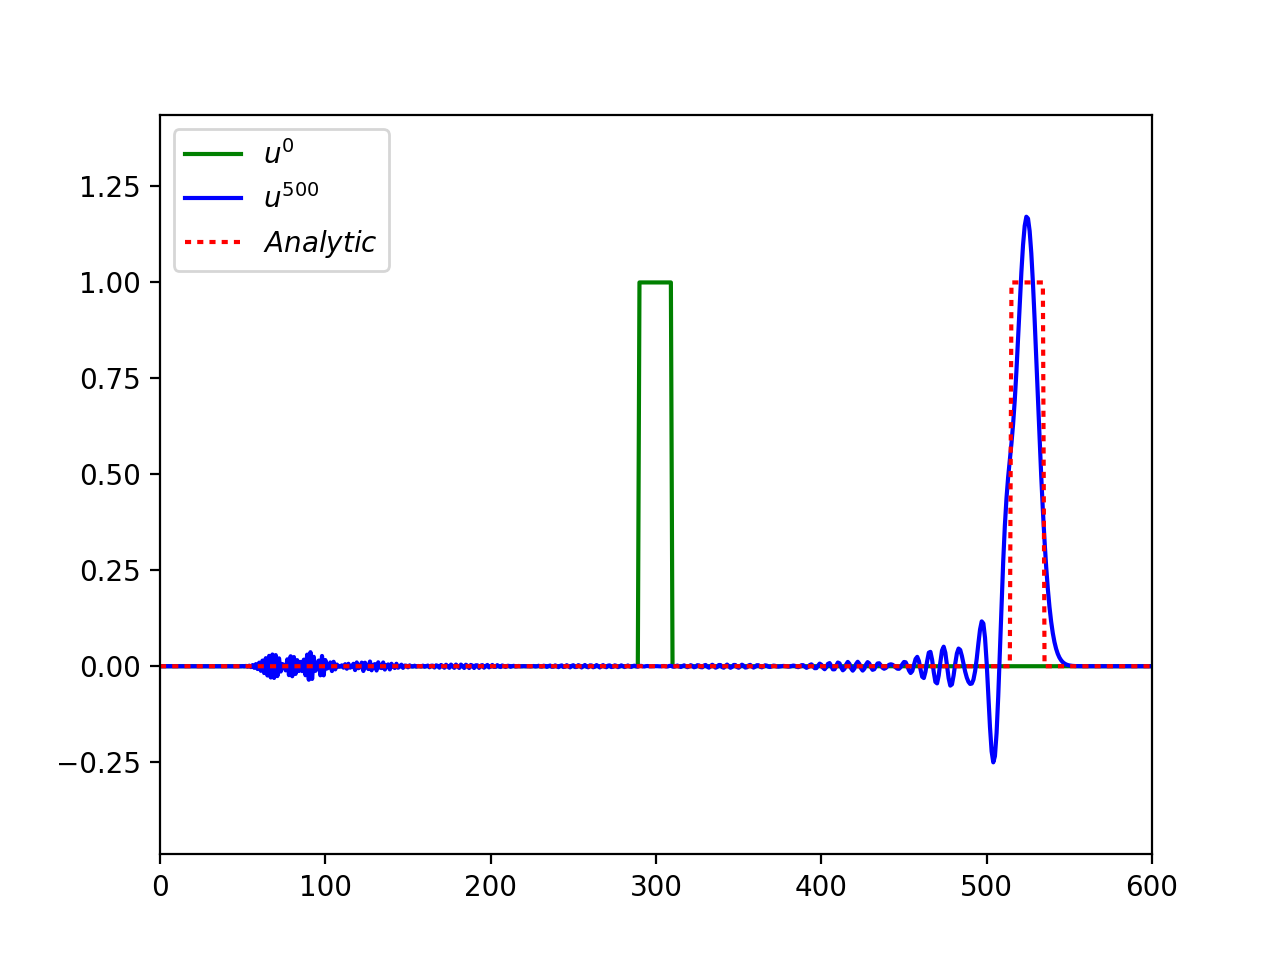

In [22]:
inline = True  # True for inline plot, False for interactive
if inline:
    %matplotlib notebook
else:
    %matplotlib
    
s = r'$u^{' + str(n_total) + r'}$'
plt.plot(x, u[0,:], 'g-',label = r'$u^0$')
plt.plot(x, u[-1,:], 'b-',label = s)
plt.xlim(x[0],x[-1])
umin, umax = np.min(u), np.max(u)
plt.ylim(umin-0.2, umax+0.2)

# Create actual solution for comparison
displacement = c*dt*n_total  # distance signal is displaced
nindex = int(displacement/dx)  # number of grid points signal is displaced
plt.plot(x, np.roll(u[0,:], nindex), 'r:', label = r'$Analytic$')

plt.legend((r'$u^0$', s, r'$Analytic$'), loc = 0)
plt.show()